How well do jobs and skills pay for Data Scientists?

In [2]:
# Importing libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df_original =pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data CLeanup
df_original['job_posted_date']=pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills']=df_original['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US=df_original[(df_original['job_country']=='United States')].dropna(subset=['salary_year_avg'])

In [4]:
job_titles=df_US['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [5]:
df_US_top6=df_US[df_US['job_title_short'].isin(job_titles)]
job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

In [6]:
# Check the number of data points for each job title
print(df_US_top6['job_title_short'].value_counts())

# Filter data for Senior Data Engineer and Senior Data Analyst
senior_data_engineer_salaries=df_US_top6[df_US_top6['job_title_short']=='Senior Data Engineer']['salary_year_avg']
senior_data_analyst_salaries=df_US_top6[df_US_top6['job_title_short']=='Senior Data Analyst']['salary_year_avg']

# Print the salary data for these job titles
print("Senior Data Engineer Salaries:\n",senior_data_engineer_salaries)
print("Senior Data Analyst Salaries:\n",senior_data_analyst_salaries)

job_title_short
Data Scientist           4553
Data Analyst             4350
Data Engineer            2915
Senior Data Scientist    1241
Senior Data Engineer     1058
Senior Data Analyst       913
Name: count, dtype: int64
Senior Data Engineer Salaries:
 495       168500.0
657       165000.0
726       173500.0
1011       90000.0
1238      190000.0
            ...   
778933    132500.0
781163    147500.0
782562    182500.0
783761    130000.0
784364    147500.0
Name: salary_year_avg, Length: 1058, dtype: float64
Senior Data Analyst Salaries:
 982        85000.00000
990        90000.00000
2716      170000.00000
3263       87500.00000
4443      150000.00000
              ...     
781107    122500.00000
781183    172500.00000
781638    111175.00000
782049     66746.03125
784812    170000.00000
Name: salary_year_avg, Length: 913, dtype: float64


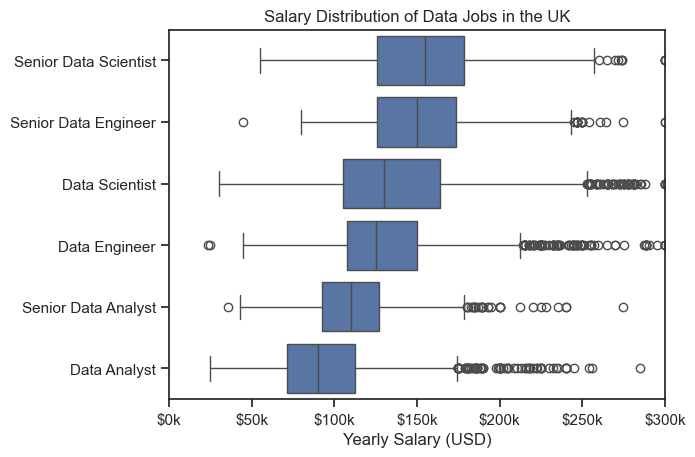

In [7]:
sns.set_theme(style='ticks')
sns.despine()
sns.boxplot(data=df_US_top6,
            x='salary_year_avg',
            y='job_title_short',
            order=job_order)
plt.title('Salary Distribution of Data Jobs in the UK')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0,300000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)

Investigating median salary vs skill for data scientists

In [10]:
# Get data science jobs in the US
df_DS_US=df_original[(df_original['job_title_short']=='Data Scientist')&(df_original['job_country']=='United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DS_US=df_DS_US.dropna(subset=['salary_year_avg'])

df_DS_US=df_DS_US.explode('job_skills')

df_DS_US[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
100,228222.0,sql
100,228222.0,r
100,228222.0,python
100,228222.0,express
116,114000.0,r


In [15]:
df_DS_top_pay=df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)

df_DS_top_pay=df_DS_top_pay.head(10)

df_DS_top_pay

,count,median
job_skills,,
asana,5,259000.00000
airtable,6,224250.00000
watson,10,213500.00000
unreal,4,211500.00000
ruby on rails,4,195500.00000
redhat,1,189500.00000
notion,9,187500.00000
slack,11,180000.00000
hugging face,15,179000.00000


In [51]:
df_DS_skills=df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DS_skills=df_DS_skills.head(10).sort_values(by='median',ascending=False)
df_DS_skills

,count,median
job_skills,,
tensorflow,474,149646.0
spark,718,135959.5
sql,2463,134500.0
aws,768,134000.0
python,3358,131867.0
r,2053,126000.0
tableau,989,125000.0
hadoop,468,125000.0
excel,490,124290.0


Plotting

In [35]:
from matplotlib.ticker import FuncFormatter

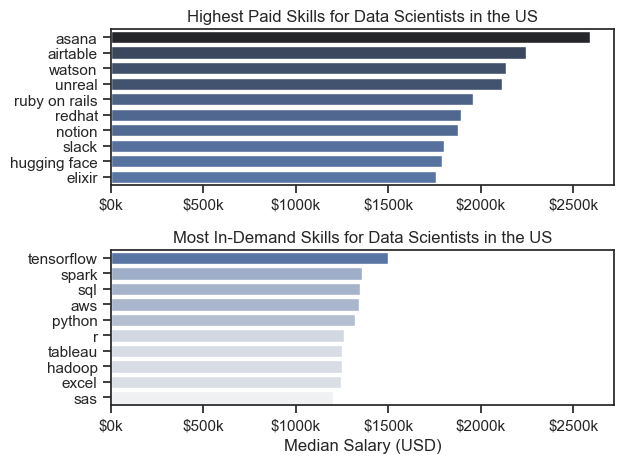

In [52]:
fig, ax=plt.subplots(2,1)

#Top 10 Highest Paid Skills for Data Scientists
sns.set_theme(style='ticks')
sns.barplot(data=df_DS_top_pay,
            x='median',
            y='job_skills',
            hue='median',
            palette='dark:b_r',
            ax=ax[0])
ax[0].set(ylabel='',
          xlabel='',
          title='Highest Paid Skills for Data Scientists in the US')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/100)}k'))

#Top 10 Most In-Demand Skills for Data Scientists
sns.barplot(data=df_DS_skills,
            x='median',
            y=df_DS_skills.index,
            hue='median',
            palette='light:b',
            ax=ax[1])
ax[1].set(ylabel='',
          xlabel='Median Salary (USD)',
          title='Most In-Demand Skills for Data Scientists in the US',
          xlim=ax[0].get_xlim())
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/100)}k'))

plt.tight_layout()